# Model fit on Time series data
## Subash Chandra Biswal (U77884251)

### Data Set Information:

Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.


Attribute Information:

- **holiday :** Categorical US National holidays plus regional holiday, Minnesota State Fair
- **temp :** Numeric Average temp in kelvin
- **rain_1h :** Numeric Amount in mm of rain that occurred in the hour
- **snow_1h :** Numeric Amount in mm of snow that occurred in the hour
- **clouds_all :** Numeric Percentage of cloud cover
- **weather_main :** Categorical Short textual description of the current weather
- **weather_description :** Categorical Longer textual description of the current weather
- **date_time :** DateTime Hour of the data collected in local CST time
- **traffic_volume :** Numeric Hourly I-94 ATR 301 reported westbound traffic volume

**Source:** UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)


In [1]:
import pandas as pd
import numpy as np
# Common imports
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(1)
tf.random.set_seed(1)

## Load dataset

In [2]:
traffic_data = pd.read_csv("traffic_data.csv")
traffic_data

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
0,288.28,0.0,0.0,40,5545
1,289.36,0.0,0.0,75,4516
2,289.58,0.0,0.0,90,4767
3,290.13,0.0,0.0,90,5026
4,291.14,0.0,0.0,75,4918
...,...,...,...,...,...
48199,283.45,0.0,0.0,75,3543
48200,282.76,0.0,0.0,90,2781
48201,282.73,0.0,0.0,90,2159
48202,282.09,0.0,0.0,90,1450


In [3]:
arr2D = traffic_data.to_numpy() # convert the dataframe to a numpy array
arr2D

array([[ 288.28,    0.  ,    0.  ,   40.  , 5545.  ],
       [ 289.36,    0.  ,    0.  ,   75.  , 4516.  ],
       [ 289.58,    0.  ,    0.  ,   90.  , 4767.  ],
       ...,
       [ 282.73,    0.  ,    0.  ,   90.  , 2159.  ],
       [ 282.09,    0.  ,    0.  ,   90.  , 1450.  ],
       [ 282.12,    0.  ,    0.  ,   90.  ,  954.  ]])

The 2D data above is not not our input to the recurrent network - we have seven feaures, but no observations. Observations will be the sequences length number of rows.


In [4]:
def create_sequences(data, seq_length):
    obs = []
    print(obs)    
    for i in range(len(data)-seq_length-1):
        obs.append(data[i:(i+seq_length)+1])
    return np.array(obs)

In [5]:
RNN_input = create_sequences(arr2D, 6)
RNN_input

[]


array([[[2.8828e+02, 0.0000e+00, 0.0000e+00, 4.0000e+01, 5.5450e+03],
        [2.8936e+02, 0.0000e+00, 0.0000e+00, 7.5000e+01, 4.5160e+03],
        [2.8958e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 4.7670e+03],
        ...,
        [2.9114e+02, 0.0000e+00, 0.0000e+00, 7.5000e+01, 4.9180e+03],
        [2.9172e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.1810e+03],
        [2.9317e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.5840e+03]],

       [[2.8936e+02, 0.0000e+00, 0.0000e+00, 7.5000e+01, 4.5160e+03],
        [2.8958e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 4.7670e+03],
        [2.9013e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 5.0260e+03],
        ...,
        [2.9172e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.1810e+03],
        [2.9317e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.5840e+03],
        [2.9386e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00, 6.0150e+03]],

       [[2.8958e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 4.7670e+03],
        [2.9013e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 5.0

In [6]:
RNN_input.shape

(48197, 7, 5)

In [7]:
RNN_input[-1]

array([[2.8438e+02, 0.0000e+00, 0.0000e+00, 7.5000e+01, 4.2830e+03],
       [2.8479e+02, 0.0000e+00, 0.0000e+00, 7.5000e+01, 4.1320e+03],
       [2.8420e+02, 2.5000e-01, 0.0000e+00, 7.5000e+01, 3.9470e+03],
       [2.8345e+02, 0.0000e+00, 0.0000e+00, 7.5000e+01, 3.5430e+03],
       [2.8276e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 2.7810e+03],
       [2.8273e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 2.1590e+03],
       [2.8209e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 1.4500e+03]])

In [8]:
arr2D[1]

array([ 289.36,    0.  ,    0.  ,   75.  , 4516.  ])

Review the data we have created above.  We have 48204 'observations', each with 6 time steps and 5 features (temp, rain_1h, snow_1h, clouds_all, and traffic_volume). The last row of each observation is the target value we want to predict. We only need the traffic value from the last row of each observation (the other values are not needed - because if you're trying to predict tomorrow's traffic volume, you don't have any measures from tomorrow, because it's the future :) ).

Let's now extract our target variable. In this case, we want to predict the next day's traffic volume, so we will extract the last traffic volume from each sequence (observation).

In [9]:
y = RNN_input[:,-1,-1] # the 3 is the index of the column, and the 0 is the index of the row
y

array([5584., 6015., 5791., ..., 2781., 2159., 1450.])

In [10]:
X = RNN_input[:,0:6,0:5] # the 3 is the index of the column, and the 0 is the index of the row
X

array([[[2.8828e+02, 0.0000e+00, 0.0000e+00, 4.0000e+01, 5.5450e+03],
        [2.8936e+02, 0.0000e+00, 0.0000e+00, 7.5000e+01, 4.5160e+03],
        [2.8958e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 4.7670e+03],
        [2.9013e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 5.0260e+03],
        [2.9114e+02, 0.0000e+00, 0.0000e+00, 7.5000e+01, 4.9180e+03],
        [2.9172e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.1810e+03]],

       [[2.8936e+02, 0.0000e+00, 0.0000e+00, 7.5000e+01, 4.5160e+03],
        [2.8958e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 4.7670e+03],
        [2.9013e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 5.0260e+03],
        [2.9114e+02, 0.0000e+00, 0.0000e+00, 7.5000e+01, 4.9180e+03],
        [2.9172e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.1810e+03],
        [2.9317e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.5840e+03]],

       [[2.8958e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 4.7670e+03],
        [2.9013e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 5.0260e+03],
        [2.9114e

In [11]:
print(X.shape)
print(y.shape)

(48197, 6, 5)
(48197,)


### Create dataframe to save the results

In [12]:
df_results = pd.DataFrame({'model': [], 'time': [], 'error': []})

## Fit the data to a Recurrent neural network

In [13]:
X_train = X[:int(len(X)*0.8)]
X_test = X[int(len(X)*0.8):]
y_train = y[:int(len(y)*0.8)]
y_test = y[int(len(y)*0.8):]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [14]:
int(len(X)*0.8)

38557

In [15]:
y_train = y_train.reshape(-1,1)
y_train

array([[5584.],
       [6015.],
       [5791.],
       ...,
       [3045.],
       [3045.],
       [2704.]], dtype=float32)

In [16]:
y_test = y_test.reshape(-1,1)
y_test

array([[2704.],
       [2704.],
       [2204.],
       ...,
       [2781.],
       [2159.],
       [1450.]], dtype=float32)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(38557, 6, 5)
(9640, 6, 5)
(38557, 1)
(9640, 1)


In [18]:
X_train

array([[[2.8828e+02, 0.0000e+00, 0.0000e+00, 4.0000e+01, 5.5450e+03],
        [2.8936e+02, 0.0000e+00, 0.0000e+00, 7.5000e+01, 4.5160e+03],
        [2.8958e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 4.7670e+03],
        [2.9013e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 5.0260e+03],
        [2.9114e+02, 0.0000e+00, 0.0000e+00, 7.5000e+01, 4.9180e+03],
        [2.9172e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.1810e+03]],

       [[2.8936e+02, 0.0000e+00, 0.0000e+00, 7.5000e+01, 4.5160e+03],
        [2.8958e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 4.7670e+03],
        [2.9013e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 5.0260e+03],
        [2.9114e+02, 0.0000e+00, 0.0000e+00, 7.5000e+01, 4.9180e+03],
        [2.9172e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.1810e+03],
        [2.9317e+02, 0.0000e+00, 0.0000e+00, 1.0000e+00, 5.5840e+03]],

       [[2.8958e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 4.7670e+03],
        [2.9013e+02, 0.0000e+00, 0.0000e+00, 9.0000e+01, 5.0260e+03],
        [2.9114e

Now, we need to split out data into train and test and normalize the data.

We are now ready to fit the data to a recurrent neural network.  We will use LSTM and GRU for this dataset.  We will use the mean squared error loss function and the adam optimizer. Our input consists of 38557 observations, each with 6 time steps and 5 features.  Our target is the traffic volume for the last time step of each observation.

# LSTM with one layer

In [22]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM
n_steps = 6
n_inputs = 5

lstm_model = Sequential()
lstm_model.add(LSTM(32, input_shape=(n_steps, n_inputs)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

In [23]:
import time
start_time = time.time()

lstm_model.fit(X_train, y_train, epochs=20, batch_size=4, verbose=1)

end_time = time.time()

Epoch 1/20
9640/9640 [==============================] - 97s 10ms/step - loss: 14114177.0000
Epoch 2/20
9640/9640 [==============================] - 89s 9ms/step - loss: 13191055.0000
Epoch 3/20
9640/9640 [==============================] - 87s 9ms/step - loss: 12313330.0000
Epoch 4/20
9640/9640 [==============================] - 89s 9ms/step - loss: 11483977.0000
Epoch 5/20
9640/9640 [==============================] - 89s 9ms/step - loss: 10699431.0000
Epoch 6/20
9640/9640 [==============================] - 100s 10ms/step - loss: 9954467.0000
Epoch 7/20
9640/9640 [==============================] - 102s 11ms/step - loss: 9246014.0000
Epoch 8/20
9640/9640 [==============================] - 102s 11ms/step - loss: 8568731.0000
Epoch 9/20
9640/9640 [==============================] - 84s 9ms/step - loss: 7891817.0000
Epoch 10/20
9640/9640 [==============================] - 87s 9ms/step - loss: 7243341.0000
Epoch 11/20
9640/9640 [==============================] - 89s 9ms/step - loss: 6637675.0

In [24]:
y_pred = lstm_model.predict(X_test)

y_pred

302/302 [==============================] - 3s 6ms/step


array([[2464.113 ],
       [2653.8755],
       [2542.7827],
       ...,
       [2987.7666],
       [2464.195 ],
       [2329.617 ]], dtype=float32)

In [25]:
results = pd.DataFrame()

results['actual'] = y_test.flatten()
results['predicted'] = y_pred.flatten()
results['residual'] = results['actual'] - results['predicted']

results

,actual,predicted,residual
0,2704.0,2464.113037,239.886963
1,2704.0,2653.875488,50.124512
2,2204.0,2542.782715,-338.782715
3,2204.0,2334.047852,-130.047852
4,1713.0,2447.326660,-734.326660
...,...,...,...
9635,3947.0,2987.766602,959.233398
9636,3543.0,2987.766602,555.233398
9637,2781.0,2987.766602,-206.766602
9638,2159.0,2464.195068,-305.195068


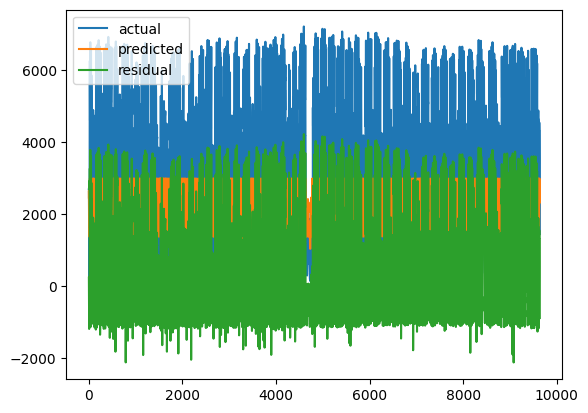

In [26]:
from matplotlib import pyplot as plt

plt.plot(results['actual'], label = 'actual')
plt.plot(results['predicted'], label = 'predicted')
plt.plot(results['residual'], label = 'residual')

plt.legend()

plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
me=mean_squared_error(y_test, y_pred)**0.5
me

1623.61225358766

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df_result = pd.DataFrame(
    {
        'model': ['LSTM'], 
        'time': [end_time - start_time],
        'error': [me]
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

# LSTM with more layers

In [29]:
n_steps = 6
n_inputs = 5

dlstm_model = Sequential()
dlstm_model.add(LSTM(32, return_sequences=True, input_shape=(n_steps, n_inputs)))
dlstm_model.add(LSTM(32, return_sequences=True))
dlstm_model.add(LSTM(32))
dlstm_model.add(Dense(1))
dlstm_model.compile(loss='mean_squared_error', optimizer='adam')


In [30]:
dlstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 6, 32)             4864      
                                                                 
 lstm_2 (LSTM)               (None, 6, 32)             8320      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21,537
Trainable params: 21,537
Non-trainable params: 0
_________________________________________________________________


In [31]:
import time
start_time = time.time()

dlstm_model.fit(X_train, y_train, epochs=20, batch_size=4, verbose=1)

end_time = time.time()

Epoch 1/20
9640/9640 [==============================] - 204s 20ms/step - loss: 13580237.0000
Epoch 2/20
9640/9640 [==============================] - 202s 21ms/step - loss: 11816567.0000
Epoch 3/20
9640/9640 [==============================] - 195s 20ms/step - loss: 10252330.0000
Epoch 4/20
9640/9640 [==============================] - 200s 21ms/step - loss: 8884237.0000
Epoch 5/20
9640/9640 [==============================] - 207s 22ms/step - loss: 7709358.5000
Epoch 6/20
9640/9640 [==============================] - 196s 20ms/step - loss: 6723441.0000
Epoch 7/20
9640/9640 [==============================] - 198s 21ms/step - loss: 5918420.0000
Epoch 8/20
9640/9640 [==============================] - 209s 22ms/step - loss: 5289359.0000
Epoch 9/20
9640/9640 [==============================] - 212s 22ms/step - loss: 4822592.0000
Epoch 10/20
9640/9640 [==============================] - 216s 22ms/step - loss: 4492670.5000
Epoch 11/20
9640/9640 [==============================] - 211s 22ms/step - lo

In [32]:
y_pred = dlstm_model.predict(X_test)

y_pred

302/302 [==============================] - 9s 18ms/step


array([[2118.9072],
       [2315.362 ],
       [2315.3623],
       ...,
       [4266.5405],
       [2883.08  ],
       [1423.7719]], dtype=float32)

In [33]:
results = pd.DataFrame()

results['actual'] = y_test.flatten()
results['predicted'] = y_pred.flatten()
results['residual'] = results['actual'] - results['predicted']

results

,actual,predicted,residual
0,2704.0,2118.907227,585.092773
1,2704.0,2315.362061,388.637939
2,2204.0,2315.362305,-111.362305
3,2204.0,1103.011597,1100.988403
4,1713.0,877.242737,835.757263
...,...,...,...
9635,3947.0,4266.657227,-319.657227
9636,3543.0,4266.657227,-723.657227
9637,2781.0,4266.540527,-1485.540527
9638,2159.0,2883.080078,-724.080078


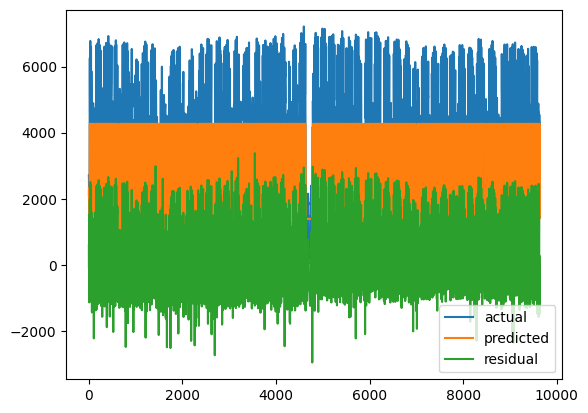

In [34]:
from matplotlib import pyplot as plt

plt.plot(results['actual'], label = 'actual')
plt.plot(results['predicted'], label = 'predicted')
plt.plot(results['residual'], label = 'residual')

plt.legend()

plt.show()

In [35]:
me=mean_squared_error(y_test, y_pred)**0.5
me

977.4569363915732

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df_result = pd.DataFrame(
    {
        'model': ['MULTI LAYER LSTM'], 
        'time': [end_time - start_time],
        'error': [me]
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

# GRU with one layer

In [37]:
from keras.layers import GRU
n_steps = 6
n_inputs = 5

gru_model = Sequential()
gru_model.add(GRU(32, input_shape=(n_steps, n_inputs)))
gru_model.add(Dense(1))
gru_model.compile(loss='mean_squared_error', optimizer='adam')

In [38]:
gru_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                3744      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,777
Trainable params: 3,777
Non-trainable params: 0
_________________________________________________________________


In [39]:
import time
start_time = time.time()

gru_model.fit(X_train, y_train, epochs=20, batch_size=4, verbose=1)

end_time = time.time()

Epoch 1/20
9640/9640 [==============================] - 139s 14ms/step - loss: 13990422.0000
Epoch 2/20
9640/9640 [==============================] - 212s 22ms/step - loss: 12773875.0000
Epoch 3/20
9640/9640 [==============================] - 123s 13ms/step - loss: 11631959.0000
Epoch 4/20
9640/9640 [==============================] - 120s 12ms/step - loss: 10573882.0000
Epoch 5/20
9640/9640 [==============================] - 99s 10ms/step - loss: 9589807.0000
Epoch 6/20
9640/9640 [==============================] - 78s 8ms/step - loss: 8676327.0000
Epoch 7/20
9640/9640 [==============================] - 77s 8ms/step - loss: 7833145.5000
Epoch 8/20
9640/9640 [==============================] - 85s 9ms/step - loss: 7058717.5000
Epoch 9/20
9640/9640 [==============================] - 77s 8ms/step - loss: 6350633.5000
Epoch 10/20
9640/9640 [==============================] - 105s 11ms/step - loss: 5699501.5000
Epoch 11/20
9640/9640 [==============================] - 121s 13ms/step - loss: 5110

In [40]:
y_pred = gru_model.predict(X_test)
y_pred

302/302 [==============================] - 3s 9ms/step


array([[2767.7593],
       [2766.4604],
       [2603.1543],
       ...,
       [3460.7344],
       [2767.7593],
       [1725.7402]], dtype=float32)

In [41]:
results = pd.DataFrame()

results['actual'] = y_test.flatten()
results['predicted'] = y_pred.flatten()
results['residual'] = results['actual'] - results['predicted']

results

,actual,predicted,residual
0,2704.0,2767.759277,-63.759277
1,2704.0,2766.460449,-62.460449
2,2204.0,2603.154297,-399.154297
3,2204.0,1557.843994,646.156006
4,1713.0,1745.448486,-32.448486
...,...,...,...
9635,3947.0,3460.749512,486.250488
9636,3543.0,3460.749512,82.250488
9637,2781.0,3460.734375,-679.734375
9638,2159.0,2767.759277,-608.759277


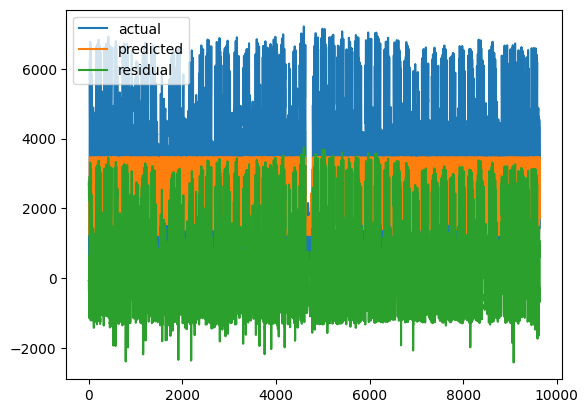

In [42]:
from matplotlib import pyplot as plt

plt.plot(results['actual'], label = 'actual')
plt.plot(results['predicted'], label = 'predicted')
plt.plot(results['residual'], label = 'residual')

plt.legend()

plt.show()

In [43]:
me=mean_squared_error(y_test, y_pred)**0.5
me

1384.1143377625997

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df_result = pd.DataFrame(
    {
        'model': ['GRU'], 
        'time': [end_time - start_time],
        'error': [me]
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

# GRU with multi layer

In [45]:
n_steps = 6
n_inputs = 5

dgru_model = Sequential()
dgru_model.add(GRU(32, return_sequences=True, input_shape=(n_steps, n_inputs)))
dgru_model.add(GRU(32, return_sequences=True))
dgru_model.add(GRU(32))
dgru_model.add(Dense(1))
dgru_model.compile(loss='mean_squared_error', optimizer='adam')

In [46]:
dgru_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 6, 32)             3744      
                                                                 
 gru_2 (GRU)                 (None, 6, 32)             6336      
                                                                 
 gru_3 (GRU)                 (None, 32)                6336      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 16,449
Trainable params: 16,449
Non-trainable params: 0
_________________________________________________________________


In [47]:
import time
start_time = time.time()

dgru_model.fit(X_train, y_train, epochs=20, batch_size=4, verbose=1)

end_time = time.time()

Epoch 1/20
9640/9640 [==============================] - 298s 30ms/step - loss: 13589889.0000
Epoch 2/20
9640/9640 [==============================] - 284s 29ms/step - loss: 11825702.0000
Epoch 3/20
9640/9640 [==============================] - 287s 30ms/step - loss: 10254914.0000
Epoch 4/20
9640/9640 [==============================] - 284s 29ms/step - loss: 8825278.0000
Epoch 5/20
9640/9640 [==============================] - 337s 35ms/step - loss: 7543594.5000
Epoch 6/20
9640/9640 [==============================] - 293s 30ms/step - loss: 6405981.5000
Epoch 7/20
9640/9640 [==============================] - 324s 34ms/step - loss: 5410470.0000
Epoch 8/20
9640/9640 [==============================] - 305s 32ms/step - loss: 4536196.0000
Epoch 9/20
9640/9640 [==============================] - 314s 33ms/step - loss: 3785261.0000
Epoch 10/20
9640/9640 [==============================] - 249s 26ms/step - loss: 3129626.2500
Epoch 11/20
9640/9640 [==============================] - 316s 33ms/step - lo

In [48]:
y_pred = dgru_model.predict(X_test)
y_pred

302/302 [==============================] - 8s 15ms/step


array([[2194.7314],
       [2560.9907],
       [4065.0974],
       ...,
       [2676.8   ],
       [2522.3777],
       [2248.2144]], dtype=float32)

In [49]:
results = pd.DataFrame()

results['actual'] = y_test.flatten()
results['predicted'] = y_pred.flatten()
results['residual'] = results['actual'] - results['predicted']

results

,actual,predicted,residual
0,2704.0,2194.731445,509.268555
1,2704.0,2560.990723,143.009277
2,2204.0,4065.097412,-1861.097412
3,2204.0,4065.097412,-1861.097412
4,1713.0,4065.097412,-2352.097412
...,...,...,...
9635,3947.0,4446.162109,-499.162109
9636,3543.0,3370.234863,172.765137
9637,2781.0,2676.800049,104.199951
9638,2159.0,2522.377686,-363.377686


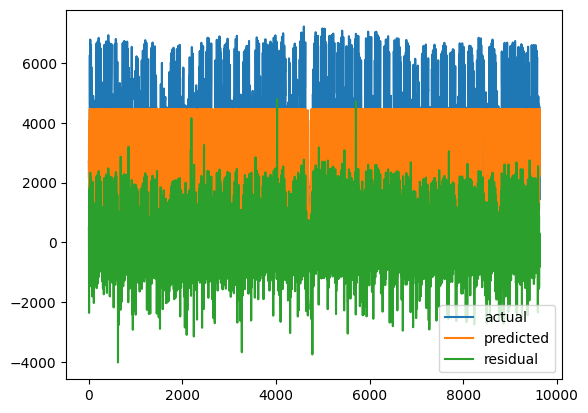

In [50]:
from matplotlib import pyplot as plt

plt.plot(results['actual'], label = 'actual')
plt.plot(results['predicted'], label = 'predicted')
plt.plot(results['residual'], label = 'residual')

plt.legend()

plt.show()

In [51]:
me=mean_squared_error(y_test, y_pred)**0.5
me

998.0985672767996

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df_result = pd.DataFrame(
    {
        'model': ['MULTI LAYER GRU'], 
        'time': [end_time - start_time],
        'error': [me]
    }
)

df_results = pd.concat([df_results, df_result], ignore_index=True, axis=0)

In [53]:
df_results

,model,time,error
0,LSTM,1822.206199,1623.612254
1,MULTI LAYER LSTM,4092.250899,977.456936
2,GRU,2520.986892,1384.114338
3,MULTI LAYER GRU,6081.355305,998.098567


# Model Analysis

The time taken by the models and the errors show that multilayer LSTM is the best model. It has minimum error and less time compared to GRU multilayer model. The multilayer models perform batter than sihngle layer models.